**Question 1**: Calculate the variance $\sigma^2$, skewness $\Sigma$, and kurtosis $K$ of
  a uniform distribution of mean $\mu$ and width $W$.

That is, for 

\begin{align}
    p_U(x) = \begin{cases}
            \frac{1}{W} &\quad\text{if}~ \mu-W/2 < x < \mu+W/2 \\
            0 &\quad\text{otherwise}
        \end{cases}
\end{align}

compute

\begin{align}
\sigma^2 &= \langle (x-\mu)^2 \rangle \\
\Sigma &= \frac{1}{\sigma^3} \langle (x-\mu)^3 \rangle \\
K &= \frac{1}{\sigma^4} \langle (x-\mu)^4 \rangle - 3
\end{align}

----

\begin{align}
\sigma^2 &= \langle (x-\mu)^2 \rangle \\
&= \int (x-\mu)^2 p_U(x) dx\\
&= \int_{\mu-W/2}^{\mu+W/2} (x-\mu)^2 \frac{1}{W} dx\\
&= \int_{-W/2}^{W/2} x^2 \frac{1}{W} dx\\
&= \boxed{\frac{W^2}{12}}
\end{align}

\begin{align}
\Sigma &= \frac{1}{\sigma^3} \langle (x-\mu)^3 \rangle \\
&= \frac{1}{\sigma^3} \int (x-\mu)^3 p_U(x) dx\\
&= \frac{1}{\sigma^3} \int_{\mu-W/2}^{\mu+W/2} (x-\mu)^3 \frac{1}{W} dx\\
&= \frac{1}{\sigma^3} \int_{-W/2}^{W/2} x^3 \frac{1}{W} dx\\
&= \boxed{0}
\end{align}

\begin{align}
K &= \frac{1}{\sigma^4} \langle (x-\mu)^4 \rangle - 3\\
&= \left( \frac{1}{\sigma^4} \int (x-\mu)^4 p_U(x) dx \right) - 3\\
&= \frac{1}{\sigma^4} \left(\int_{\mu-W/2}^{\mu+W/2} (x-\mu)^4 \frac{1}{W} dx \right) - 3\\
&= \frac{1}{\sigma^4} \left(\int_{-W/2}^{W/2} x^4 \frac{1}{W} dx \right) - 3 \\
&= \frac{W^4}{80 \sigma^4} - 3 
~=~ \frac{144}{80} - 3 \\
&= \boxed{-\frac{6}{5}}
\end{align}

----

**Question 2**: For the binomial distribution,
  \begin{equation}
    p_B(x; n, p) = \binom{n}{x}\,p^x\,q^{n-x} = \frac{n!}{x!\,(n-x)!}\,p^x\,(1-p)^{n-x}
  \end{equation}
  for observing $x$ of $n$ items and $p$ and $q=(1-p)$ are the success
  and failure probabilities, respectively,
  
  (a) show that the average number of successes $\mu = np$.
  
  (b) show that the variance of the distribution $\sigma^2 = np(1-p)$.
  

Hint: It can be helpful to use the fact that the sum of the probabilities over all possibilities is 1.

----

\begin{array}
~ \mu &= \langle x \rangle\\ 
&= \sum_{x=0}^n x p_B(x;n,p)\\
&= \sum_{x=1}^n \frac{x n!}{x! (n-x)!} p^x q^{n-x}\\
&= \sum_{x=1}^n \frac{n!}{(x-1)! (n-x)!} p^x q^{n-x}\\
&= np \sum_{x=1}^n \frac{(n-1)!}{(x-1)! (n-x)!}p^{x-1} q^{n-x}\\
&= np \sum_{x=1}^n p_B(x-1; n-1,p)\\
&= np
\end{array}

\begin{array}
~ \sigma^2 &= \langle x^2 \rangle - \mu^2 \\
&= \left( \sum_{x=0}^n x^2 p_B(x;n,p) \right) - \mu^2 \\
&= \left( \sum_{x=1}^n x \frac{x n!}{x!(n-x)!} p^x q^{n-x} \right) - \mu^2 \\
&= \left( np \sum_{x=1}^n x \frac{(n-1)!}{(x-1)!(n-x)!} p^{x-1} q^{n-x} \right) - \mu^2 \\
&= \left( np + np \sum_{x=1}^n (x-1) \frac{(n-1)!}{(x-1)!(n-x)!} p^{x-1} q^{n-x} \right) -\mu^2 \\
&= \left( np + np \sum_{x=2}^n \frac{(n-1)!}{(x-2)!(n-x)!} p^{x-1} q^{n-x} \right) -\mu^2 \\
&= \left( np + np ~(n-1)p \sum_{x=2}^n \frac{(n-2)!}{(x-2)!(n-x)!} p^{x-2} q^{n-x} \right) -\mu^2 \\
&= \left( np + n(n-1)p^2 \sum_{x=2}^n p_B(x-2; n-2, p) \right) - \mu^2 \\
&= np + n(n-1)p^2 - (np)^2\\
&= np(1-p)
\end{array}

----

**Question 3**: Verify the results of question 1 by generating an array of random values and computing the various moments.

(a) Write a function that returns an array of random values uniformly distributed according to the probability distribution function $p_U(x)$.  

(b) Write a function that computes the mean, variance, skewness, and kurtosis of a given array of values.

(c) Use these two functions to verify that for large $N$, the empirical values closely match the theoretical values you calculated.

----

In [1]:
import numpy as np

# Question 3a
def generate_p_U(size, mu, W):
    """Generate an array of random values distributed according to
    
        p_U(x) = 1/W for mu-W/2 < x < mu+W/2, and 0 otherwise.
        
    Returns the array.
    """
    # Hint: np.random.random(size) will make an array of uniform random values between 0 and 1.

    # np.random.random(size) make random values from 0 .. 1
    # * W -> 0 .. W
    # + mu -> mu .. mu + W
    # - W/2 -> mu - W/2 .. mu + W/2
    return np.random.random(size) * W + mu - W/2.

# Question 3b
def compute_statistics(x):
    """Compute the following statistics of the input array x:
    
    mean = <x>
    variance = <(x-mean)^2>
    skewness = <(x-mean)^3> / variance^3/2
    kurtosis = <(x-mean)^4> / variance^2 - 3
    
    Returns the tuple (mean, variance, skewness, kurtosis)
    """
    # Note: There are numpy and scipy commands to do these.  For this time, don't use them.
    #       This is an exercise to do the calculation yourself.  But after this, such library
    #       functions are fair game for you to use.
    
    n = x.size
    mean = np.sum(x) / n
    var = np.sum((x-mean)**2) / n
    skew = np.sum((x-mean)**3) / n / var**1.5
    kurt = np.sum((x-mean)**4) / n / var**2 - 3.
    
    return mean, var, skew, kurt

# Question 3c
def theoretical_statistics(mu, W):
    """Give the theoretical values of mean, variance, skewness and kurtosis for p_U(x), given the
    values of mu and W.
    
    Returns the tuple (mean, variance, skewness, kurtosis)
    """
    return mu, W**2/12., 0., -1.2

In [2]:
size = 100000
mu = 3.7
W = 2.1

x = generate_p_U(size, mu, W)
mean, var, skew, kurt = compute_statistics(x)
print('Empirical statistics:')
print('   Mean = {:.4f}'.format(mean))
print('   Variance = {:.4f} = W^2/{:.4f}'.format(var,W**2/var))
print('   Skewness = {:.4f}'.format(skew))
print('   Kurtosis = {:.4f}'.format(kurt))
print()

th_mean, th_var, th_skew, th_kurt = theoretical_statistics(mu, W)
print('Theoretically expected statistics for large N:')
print('   Mean = {:.4f}'.format(th_mean))
print('   Variance = {:.4f} = W^2/{:.4f}'.format(th_var,W**2/th_var))
print('   Skewness = {:.4f}'.format(th_skew))
print('   Kurtosis = {:.4f}'.format(th_kurt))

assert len(x) == size
assert np.isclose(mean, th_mean, rtol=1.e-3)
assert np.isclose(var, th_var, rtol=1.e-2)
assert np.isclose(skew, th_skew, rtol=1.e-2, atol=1.e-2)
assert np.isclose(kurt, th_kurt, rtol=1.e-1)

# Note: There are more tests in the full auto-grading notebook, 
# so don't think you can cheat to just get those tests to pass.
# But if you're not cheating, those should be enough to ensure your code is correct.


Empirical statistics:
   Mean = 3.6978
   Variance = 0.3675 = W^2/11.9984
   Skewness = 0.0055
   Kurtosis = -1.2023

Theoretically expected statistics for large N:
   Mean = 3.7000
   Variance = 0.3675 = W^2/11.9984
   Skewness = 0.0000
   Kurtosis = -1.2000


---

**Question 4**: Write a Python function that simulates a series of
  coin flips.  The coin is unbiased ($p = q = 0.5$).  The function
  should calculate the mean number of heads per trial and the variance.
  Confirm that the variance is consistent with the expression in 2b)
  for large values of $\texttt{nTrials}$.

---

In [3]:
import random
import numpy as np

def sim_single_trial(nCoins, p=0.5):
    """Simulate a single trial of flipping nCoins coins.
    
    By default, the coins are fair (p=0.5), but you may specify a different probability of heads if you want.
    
    Returns the number of coins that turned up heads.
    """
    # Hint: Whenever possible in Python, you should try to do as much math as you can using
    #       numpy arrays, which will do the math much faster than native Python loops.
    #       This function can be written without any for loops.

    # Note: np.random has a function binomial, which basically does this function directly.
    # It's fine if you used that.  But here we show how to compute this from uniform randoms values.

    # First we make an array of nCoins random numbers from 0 to 1
    coin_prob = np.random.random(nCoins)
    
    # We can calculate a boolean (True or False) value for each element in the array
    # all at once by comparing the whole array with p.
    # Any coin whose prob is < p will have is_head=True.
    # Any coin whose prob is >= p will have is_head=False.
    is_head = coin_prob < p
    
    # Now we just need to count how many are True.
    # The trick here is that True is treated as 1 for sums, and False as 0.
    n_head = np.sum(is_head)
    
    # This is the number we want to return.
    return n_head

def sim_flips(nCoins, nTrials, p=0.5):
    """Simulate nTrials of flipping coins.  Each trial is as described in simSingleTrial.
    
    Returns the mean and variance of the number of heads from the trials.
    """
    # Make a list of the results from each trial
    n_heads = [sim_single_trial(nCoins, p) for trial in range(nTrials)]
    
    # Convert to a numpy array so we can do math on it more easily.
    n_heads = np.array(n_heads, dtype=float)
        
    # Calculate the mean and variance
    return n_heads.mean(), n_heads.var()
    
def theoretical_flip_statistics(nCoins, p=0.5):
    """Give the theoretical values of mean and variance in the number of heads for a series of nCoins flips.
    
    By default, the coins are fair (p=0.5), but you may specify a different probability of heads if you want.

    Returns the tuple (mean, variance)
    """
    return nCoins*p, nCoins*p*(1-p)

In [4]:
nCoins = 20
nTrials = int(2.e5)
p = 0.5  # Feel free to change this to see if you still get the right answer for other valeus of p.

mean, var = sim_flips(nCoins, nTrials, p)
th_mean, th_var = theoretical_flip_statistics(nCoins, p)

print('simFlips yields mean = {:.4f}, var = {:.4f}'.format(mean, var))
print('The expected result from question 2 is mean = {:.4f}, var = {:.4f}'.format(th_mean, th_var))

assert np.isclose(mean, th_mean, rtol=2.e-3)
assert np.isclose(var, th_var, rtol=1.e-2)


simFlips yields mean = 9.9997, var = 5.0054
The expected result from question 2 is mean = 10.0000, var = 5.0000



---

**Bonus Question**: Consider an asymmetric gaussian given by the following:
\begin{equation}
    p_{2G}(x; \sigma_L, \sigma_R) \propto
    \begin{cases}
    e^{-x^2/2\sigma_L^2} & x < 0 \\
    e^{-x^2/2\sigma_R^2} & x \ge 0 \\
    \end{cases}
\end{equation}
  The distribution is continuous across $x=0$.
  
  (a) Write a Python sampler that draws random numbers from this distribution.
      The sampler should take three arguments: $\sigma_L$, $\sigma_R$, and
      the number of random values to return.
  
  (b) Draw $10^6$ random numbers from this distribution for $\sigma_L = 0.4$
      and $\sigma_R = 1.2$ and use $\texttt{matplotlib}$ to plot a histogram of the
      values from $-2 \le x \le 5$.  Overplot the analytic function on the same
      graph.

---

There are a number of ways to approach this, but we'll work through how to use the cumulative probability distribution.  This solution is the most general, in that it doesn't rely on any particular insight about the specific distribution given in the problem.  Indeed, you could use this for any arbitrary pdf, even ones that are merely tabulated in a file, rather than having an analytic functional form.  

The basic idea is that if a random deviate has a probability distribution function, ${\rm pdf}(x)$, then the corresponding cumulative distribution function ${\rm cdf}(x) = \int_0^x {\rm pdf}(x^\prime)$ is uniformly distributed between 0 and 1.  Therefore, we can work backwards, drawing a uniform deviate, $c$, and then finding what value $x$ has that value of $c = {\rm cdf}(x)$.

In [5]:
def p2gauss_pdf(sigma_L, sigma_R, x):
    """Return p_2G(x) for the given sigma_L, sigma_R and x values.
    
    Returns the array, not necessarily normalized. (i.e. sum(pdf) might not == 1)
    """
    # Start with an array of the pdf.
    pdf = np.empty_like(x)
    # Use numpy indexing by boolean array to do positive and negative halves separately.
    pdf[x<0] = np.exp(-x[x<0]**2 / (2. * sigma_L**2))
    pdf[x>=0] = np.exp(-x[x>=0]**2 / (2. * sigma_R**2))
    return pdf

def compute_cdf(pdf):
    """Return the cumulative probability distribution for the given pdf.
    
    The input pdf does not need to be normalized, but the returned cdf
    will be normalized so the value range from 0 to 1.
    
    Returns the array cdf, the same size as pdf
    """
    # Hints:
    # 1. The trapezoid rule is a good approximation for the running integral
    # 2. However, using np.trapz for each index would be extremely slow.
    # 3. Think about how to use np.cumsum to compute the same thing faster.
    # 4. When you are done, cdf[0] should == 0
    # 5. And cdf[-1] should == 1
    
    # The trapezoid rule sums up (pdf[i-1] + pdf[i])/2 for each interval
    # For a given index n, 
    #    cdf[n] = (sum_i=1..n (pdf[i-1] + pdf[i]) / 2.
    #           = sum_i=0..n-1 pdf[i]/2  +  sum_i=1..n pdf[i]/2

    # Start with an array of zeros the same size as pdf
    cdf = np.zeros_like(pdf)
    
    # This function computes the cumulative running sum of the given array.
    # cum[n] = sum_i=0..n pdf[i]
    cum = np.cumsum(pdf)
    
    # Leave cdf[0] == 0, and calculate the rest from cum.
    cdf[1:] = (cum[1:] + cum[:-1])/2.
    
    # cdf[-1] is now the full integral.
    # So divide the whole array by this to normalize.
    cdf /= cum[-1]
    
    return cdf

def find_x_from_cdf(cdf, x, c):
    """Given a cdf(x) tabulated in numpy arrays cdf and x, and an array of 
    random numbers c, where 0 < c < 1, find the x values that correspond to the 
    given c = cdf(x).
    
    Returns a number array of x values corresponding to the given c values.
    """
    # Hints:
    # 1. The numpy function np.searchsorted will be helpful.
    # 2. You can get two values for cdf(x) that bracket the value you have for c.
    # 3. Linearly interpolate between these values to get the corresponding x.

    # We need to find the index k in the cdf array such that cdf[k-1] < c < cdf[k]
    # This will let us determine what x corresponds to this given cdf value.
    
    # The searchsorted function finds the index for each element in the prob array 
    # such that cdf[k-1] < c < cdf[k]
    k = np.searchsorted(cdf, c)
    assert np.all(k > 0)         # This is only guaranteed if pdf[0] = 0
    assert np.all(k < len(cdf))  # This is only guaranteed if pdf[-1] = 0
    c0 = cdf[k-1]
    c1 = cdf[k]
    assert np.all(c0 < c)  # Assert statements like these help when developing to make sure
    assert np.all(c <= c1) # the code is doing what you think it is doing.
    x0 = x[k-1]
    x1 = x[k]
    
    # Linearly interpolate between (c0, x0) and (c1, x1)
    # m = (x1-x0) / (c1-c0)
    # x = m (c - c0) + x0
    return (x1-x0)*(c-c0)/(c1-c0) + x0


def p2gauss(sigma_L, sigma_R, size):
    """Generate an array of samples drawn from the probability function 
    
        p_2G(x) = exp(-x^2/sigma_L^2) if x < 0
                  exp(-x^2/sigma_R^2) if x >= 0
                  
    Returns the array
    """
    # There is nothing for you to do here.  All the work is in the above helper functions.
    # But you should make sure you understand what is going on here, so read it through
    # carefully.
    
    # Start with a tabulated array of pdf values
    n = 2000
    x = np.linspace(-10*sigma_L, 10*sigma_R, n)
    pdf = p2gauss_pdf(sigma_L, sigma_R, x)

    # Set the first and last value in the returned array to 0.
    # We had x go out to +-10 sigma, so the first and last elements should
    # already be essentially zero, but explicitly setting them to zero 
    # means the indexing we'll want to do later can never go outside the valid 
    # range for the array.
    pdf[0] = pdf[-1] = 0

    # Next, find the corresponding cumulative probability distribution
    cdf = compute_cdf(pdf)
    
    # Generate an array of random numbers from 0 to 1.
    # These are the cdf(x) values corresponding to the values x that we want.
    c = np.random.random(size)
    
    # Determine what x value corresponds to each one.
    return find_x_from_cdf(cdf, x, c)


In [6]:
sigma_L = 0.4
sigma_R = 1.2
size = int(1.e6)

values = p2gauss(sigma_L, sigma_R, size)

print('Mean, var = {:.4f}, {:.4f}'.format(values.mean(), values.var()))



Mean, var = 0.6385, 0.7142


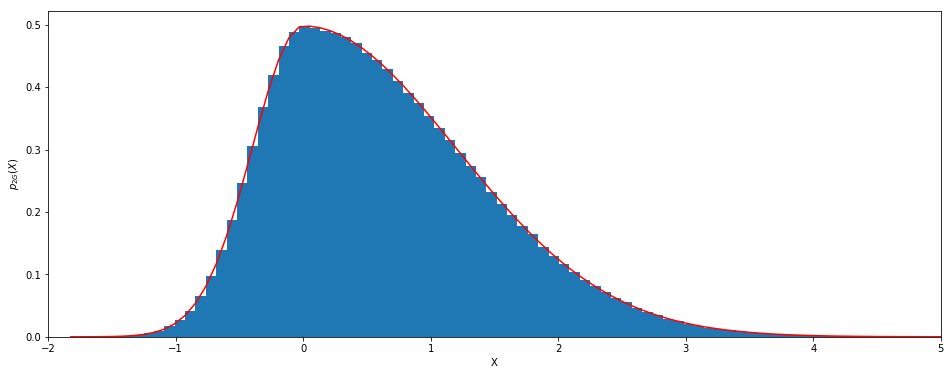

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16,6)  # This just makes the plot wider, so easier to read.

# Plot a histogram of the values as a probability distribution function.
# Also overplot the true pdf using the function p2gauss_pdf to compare.

# Hints: 
# 1. Use the plt.hist function.  Read the docs for potentially useful options.
# 2. One of the return values of plt.hist is the bin centers, which you can
#    pass to p2gauss_pdf to get the true pdf.
# 3. You'll need to normalize the values returned from p2gauss_pdf appropriately.

n, bins, p = plt.hist(values, bins=100, density=True)
true_pdf = p2gauss_pdf(sigma_L, sigma_R, bins)
# Normalize
true_pdf /= np.sum(true_pdf) * (bins[1]-bins[0])
    
plt.plot(bins, true_pdf, color='red')
plt.xlabel('X')
plt.ylabel(r'$p_{2G}(X)$')
plt.xlim(-2,5)
    
plt.show()